# Dataset Description

The competition dataset comprises a set of timeseries with 79 features and 9 responders, anonymized but representing real market data. The goal of the competition is to forecast one of these responders, i.e., `responder_6`, for up to six months in the future.

You must submit to this competition using the provided Python evaluation API, which serves test set data one timestep by timestep. To use the API, follow the example in [this notebook](https://www.kaggle.com/code/ryanholbrook/jane-street-rmf-demo-submission). (Note that this API is different from our legacy timeseries API used in past forecasting competitions.)

In [2]:
import pandas as pd
import numpy as np
import polars as pl
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator, FormatStrFormatter, PercentFormatter
import seaborn as sns

In [ ]:
# ##Kaggle interactive environment
# # DATA_DIR = "/kaggle/input/jane-street-real-time-market-data-forecasting"    
# ##local environment
DATA_DIR = "../jane-street-real-time-market-data-forecasting_Dataset"

# Features

- features.csv - metadata pertaining to the anonymized features

In [4]:
features = pd.read_csv(f"{DATA_DIR}/features.csv")
features

,feature,tag_0,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9,tag_10,tag_11,tag_12,tag_13,tag_14,tag_15,tag_16
0,feature_00,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True
1,feature_01,False,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,True
2,feature_02,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True
3,feature_03,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True
4,feature_04,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,feature_74,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False
75,feature_75,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False
76,feature_76,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False
77,feature_77,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False


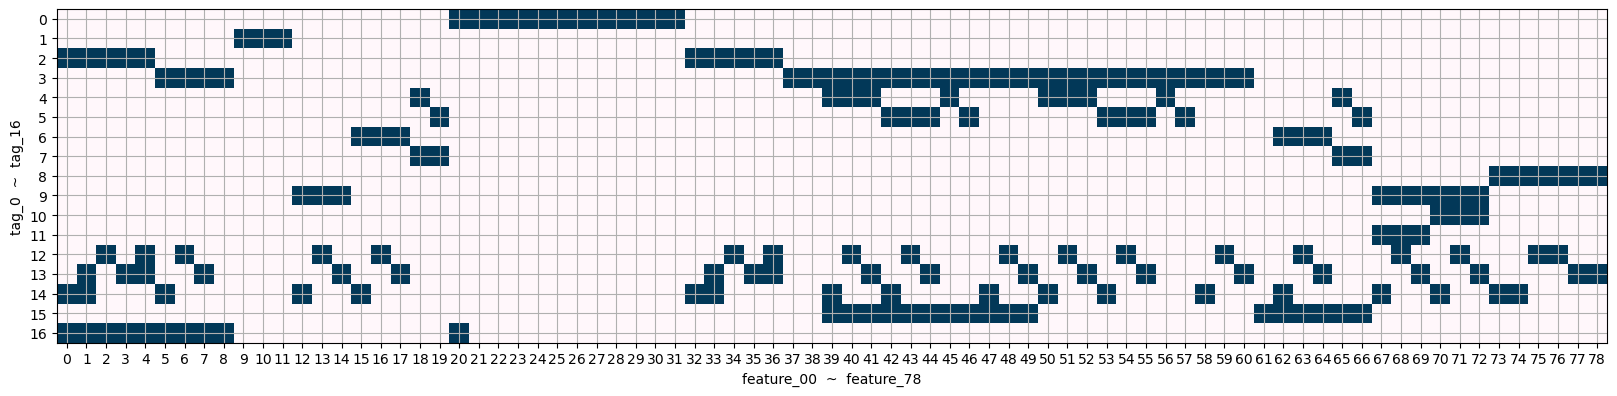

In [18]:
plt.figure(figsize=(20, 10))
plt.imshow(features.iloc[:, 1:].T.values, cmap="PuBu")
plt.xlabel("feature_00  ~  feature_78")
plt.ylabel("tag_0  ~  tag_16")
plt.yticks(np.arange(17))
plt.xticks(np.arange(79))
plt.grid()
plt.show()

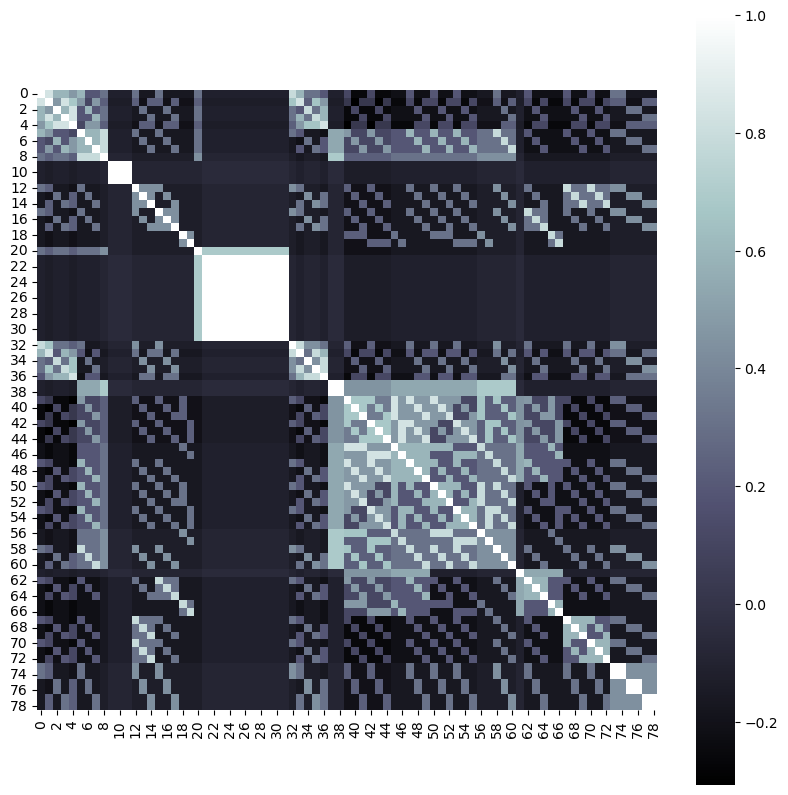

In [9]:
# corr between feature_XX and feature_YY
plt.figure(figsize=(10, 10))
sns.heatmap(features[[ f"tag_{no}" for no in range(0,17,1) ] ].T.corr(), square=True, cmap="bone")
plt.show()

# Responders

- responders.csv - metadata pertaining to the anonymized responders

In [20]:
responders = pd.read_csv(f"{DATA_DIR}/responders.csv")
responders

,responder,tag_0,tag_1,tag_2,tag_3,tag_4
0,responder_0,True,False,True,False,False
1,responder_1,True,False,False,True,False
2,responder_2,True,True,False,False,False
3,responder_3,False,False,True,False,True
4,responder_4,False,False,False,True,True
5,responder_5,False,True,False,False,True
6,responder_6,False,False,True,False,False
7,responder_7,False,False,False,True,False
8,responder_8,False,True,False,False,False


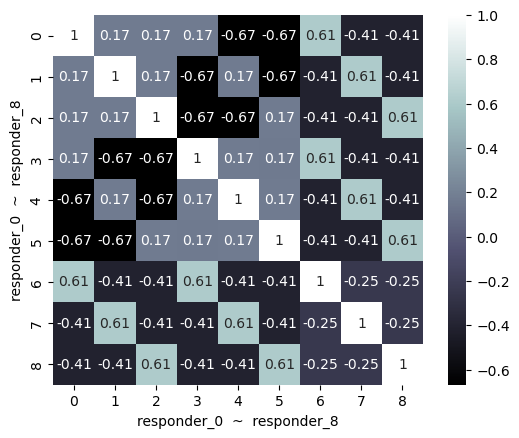

In [21]:
# corr between responder_XX and responder_YY
sns.heatmap(responders[[ f"tag_{no}" for no in range(0,5,1) ] ].T.corr(),  annot=True, square=True, cmap="bone")
plt.xlabel("responder_0  ~  responder_8")
plt.ylabel("responder_0  ~  responder_8")
plt.show()

# Sample submission

- **sample_submission.csv** - This file illustrates the format of the predictions your model should make.

In [22]:
sub = pd.read_csv(f"{DATA_DIR}/sample_submission.csv")
print( f"sub.shape = {sub.shape}" )
sub

sub.shape = (39, 2)


,row_id,responder_6
0,0,0.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,0.0
5,5,0.0
6,6,0.0
7,7,0.0
8,8,0.0
9,9,0.0


# Train.parquet

- **train.parquet** - The training set, contains historical data and returns. For convenience, the training set has been partitioned into ten parts.
  - `date_id` and `time_id` - Integer values that are ordinally sorted, providing a chronological structure to the data, although the actual time intervals between `time_id` values may vary.
  - `symbol_id` - Identifies a unique financial instrument.
  - `weight` - The weighting used for calculating the scoring function.
  - `feature_{00...78}` - Anonymized market data.
  - `responder_{0...8}` - Anonymized responders clipped between -5 and 5. The responder_6 field is what you are trying to predict.
  
  
Each row in the `{train/test}.parquet` dataset corresponds to a unique combination of a symbol (identified by `symbol_id`) and a timestamp (represented by `date_id` and `time_id`). You will be provided with multiple responders, with `responder_6` being the only responder used for scoring. The date_id column is an integer which represents the day of the event, while time_id represents a time ordering. It's important to note that the real time differences between each time_id are not guaranteed to be consistent.

The `symbol_id` column contains encrypted identifiers. Each `symbol_id` is not guaranteed to appear in all `time_id` and `date_id` combinations. Additionally, new `symbol_id` values may appear in future test sets.

In [24]:
train = (
    pl.read_parquet(f"{DATA_DIR}/train.parquet/partition_id=0/part-0.parquet")
)
train.shape

(1944210, 92)

In [26]:
train.head()

date_id,time_id,symbol_id,weight,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,feature_08,feature_09,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,…,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,responder_0,responder_1,responder_2,responder_3,responder_4,responder_5,responder_6,responder_7,responder_8
i16,i16,i8,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,i8,i8,i16,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,…,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32
0,0,1,3.889038,null,null,null,null,null,0.851033,0.242971,0.2634,-0.891687,11,7,76,-0.883028,0.003067,-0.744703,null,-0.169586,null,-1.335938,-1.707803,0.91013,null,1.636431,1.522133,-1.551398,-0.229627,null,null,1.378301,-0.283712,0.123196,null,null,…,0.204797,null,null,-0.808103,null,-2.037683,0.727661,null,-0.989118,-0.345213,-1.36224,null,null,null,null,null,-1.251104,-0.110252,-0.491157,-1.02269,0.152241,-0.659864,null,null,-0.261412,-0.211486,-0.335556,-0.281498,0.738489,-0.069556,1.380875,2.005353,0.186018,1.218368,0.775981,0.346999,0.095504
0,0,7,1.370613,null,null,null,null,null,0.676961,0.151984,0.192465,-0.521729,11,7,76,-0.865307,-0.225629,-0.582163,null,0.317467,null,-1.250016,-1.682929,1.412757,null,0.520378,0.744132,-0.788658,0.641776,null,null,0.2272,0.580907,1.128879,null,null,…,1.172836,null,null,-1.625862,null,-1.410017,1.063013,null,0.888355,0.467994,-1.36224,null,null,null,null,null,-1.065759,0.013322,-0.592855,-1.052685,-0.393726,-0.741603,null,null,-0.281207,-0.182894,-0.245565,-0.302441,2.965889,1.190077,-0.523998,3.849921,2.626981,5.0,0.703665,0.216683,0.778639
0,0,9,2.285698,null,null,null,null,null,1.056285,0.187227,0.249901,-0.77305,11,7,76,-0.675719,-0.199404,-0.586798,null,-0.814909,null,-1.296782,-2.040234,0.639589,null,1.597359,0.657514,-1.350148,0.364215,null,null,-0.017751,-0.317361,-0.122379,null,null,…,0.535897,null,null,-0.72542,null,-2.29417,1.764551,null,-0.120789,-0.063458,-1.36224,null,null,null,null,null,-0.882604,-0.072482,-0.617934,-0.86323,-0.241892,-0.709919,null,null,0.377131,0.300724,-0.106842,-0.096792,-0.864488,-0.280303,-0.326697,0.375781,1.271291,0.099793,2.109352,0.670881,0.772828
0,0,10,0.690606,null,null,null,null,null,1.139366,0.273328,0.306549,-1.262223,42,5,150,-0.694008,3.004091,0.114809,null,-0.251882,null,-1.902009,-0.979447,0.241165,null,-0.392359,-0.224699,-2.129397,-0.855287,null,null,0.404142,-0.578156,0.105702,null,null,…,2.413415,null,null,1.313203,null,-0.810125,2.939022,null,3.988801,1.834661,-1.36224,null,null,null,null,null,-0.697595,1.074309,-0.206929,-0.530602,4.765215,0.571554,null,null,-0.226891,-0.251412,-0.215522,-0.296244,0.408499,0.223992,2.294888,1.097444,1.225872,1.225376,1.114137,0.775199,-1.379516
0,0,14,0.44057,null,null,null,null,null,0.9552,0.262404,0.344457,-0.613813,44,3,16,-0.947351,-0.030018,-0.502379,null,0.646086,null,-1.844685,-1.58656,-0.182024,null,-0.969949,-0.673813,-1.282132,-1.399894,null,null,0.043815,-0.320225,-0.031713,null,null,…,1.253902,null,null,0.476195,null,-0.771732,2.843421,null,1.379815,0.411827,-1.36224,null,null,null,null,null,-0.948601,-0.136814,-0.447704,-1.141761,0.099631,-0.661928,null,null,3.678076,2.793581,2.61825,3.418133,-0.373387,-0.502764,-0.348021,-3.928148,-1.591366,-5.0,-3.57282,-1.089123,-5.0


In [27]:
print(str(train.columns))

['date_id', 'time_id', 'symbol_id', 'weight', 'feature_00', 'feature_01', 'feature_02', 'feature_03', 'feature_04', 'feature_05', 'feature_06', 'feature_07', 'feature_08', 'feature_09', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29', 'feature_30', 'feature_31', 'feature_32', 'feature_33', 'feature_34', 'feature_35', 'feature_36', 'feature_37', 'feature_38', 'feature_39', 'feature_40', 'feature_41', 'feature_42', 'feature_43', 'feature_44', 'feature_45', 'feature_46', 'feature_47', 'feature_48', 'feature_49', 'feature_50', 'feature_51', 'feature_52', 'feature_53', 'feature_54', 'feature_55', 'feature_56', 'feature_57', 'feature_58', 'feature_59', 'feature_60', 'feature_61', 'feature_62', 'feature_63', 'feature_64', 'feature_65', 'feature_66', 'feature_67', 'f

## Missing values

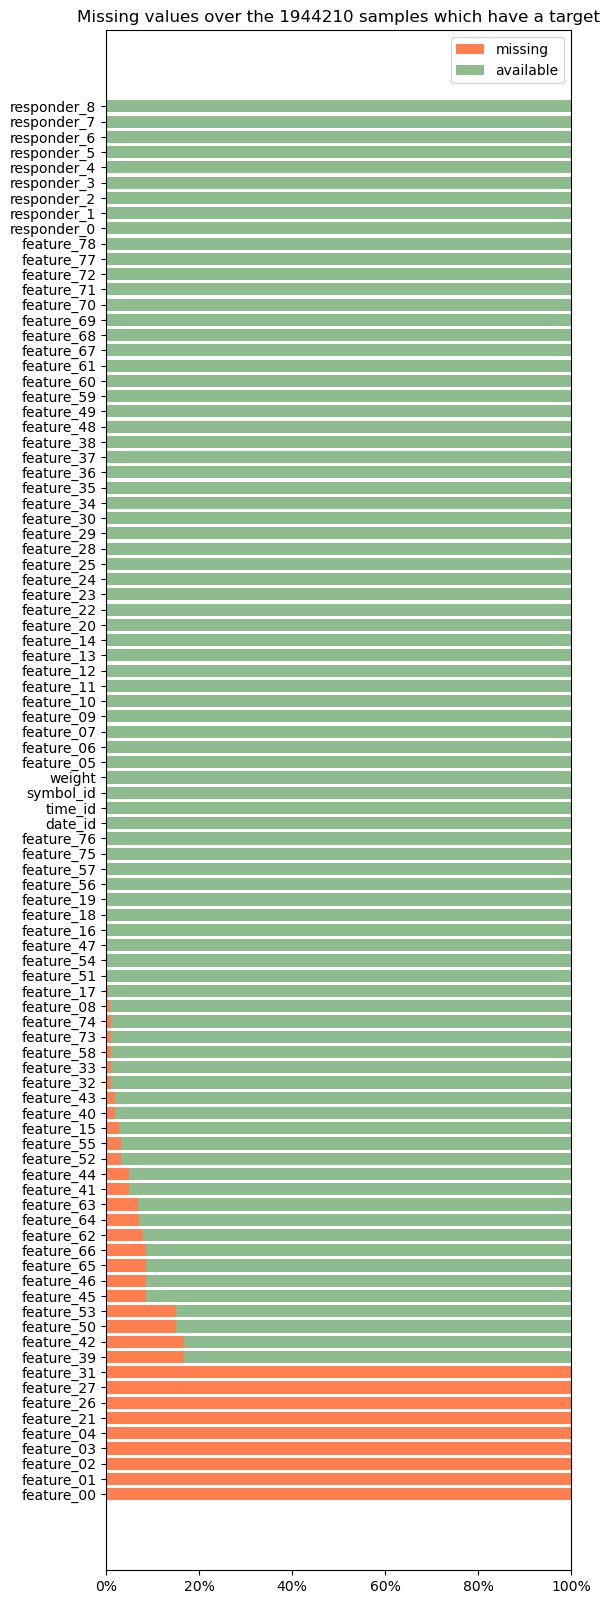

In [30]:
supervised_usable = (
    train
    .filter(pl.col('responder_6').is_not_null())
)

missing_count = (
    supervised_usable
    .null_count()
    .transpose(include_header=True,
               header_name='feature',
               column_names=['null_count'])
    .sort('null_count', descending=True)
    .with_columns((pl.col('null_count') / len(supervised_usable)).alias('null_ratio'))
)

plt.figure(figsize=(6, 20))
plt.title(f'Missing values over the {len(supervised_usable)} samples which have a target')
plt.barh(np.arange(len(missing_count)), missing_count.get_column('null_ratio'), color='coral', label='missing')
plt.barh(np.arange(len(missing_count)), 
         1 - missing_count.get_column('null_ratio'),
         left=missing_count.get_column('null_ratio'),
         color='darkseagreen', label='available')
plt.yticks(np.arange(len(missing_count)), missing_count.get_column('feature'))
plt.gca().xaxis.set_major_formatter(PercentFormatter(xmax=1, decimals=0))
plt.xlim(0, 1)
plt.legend()
plt.show()

## feature_00-78

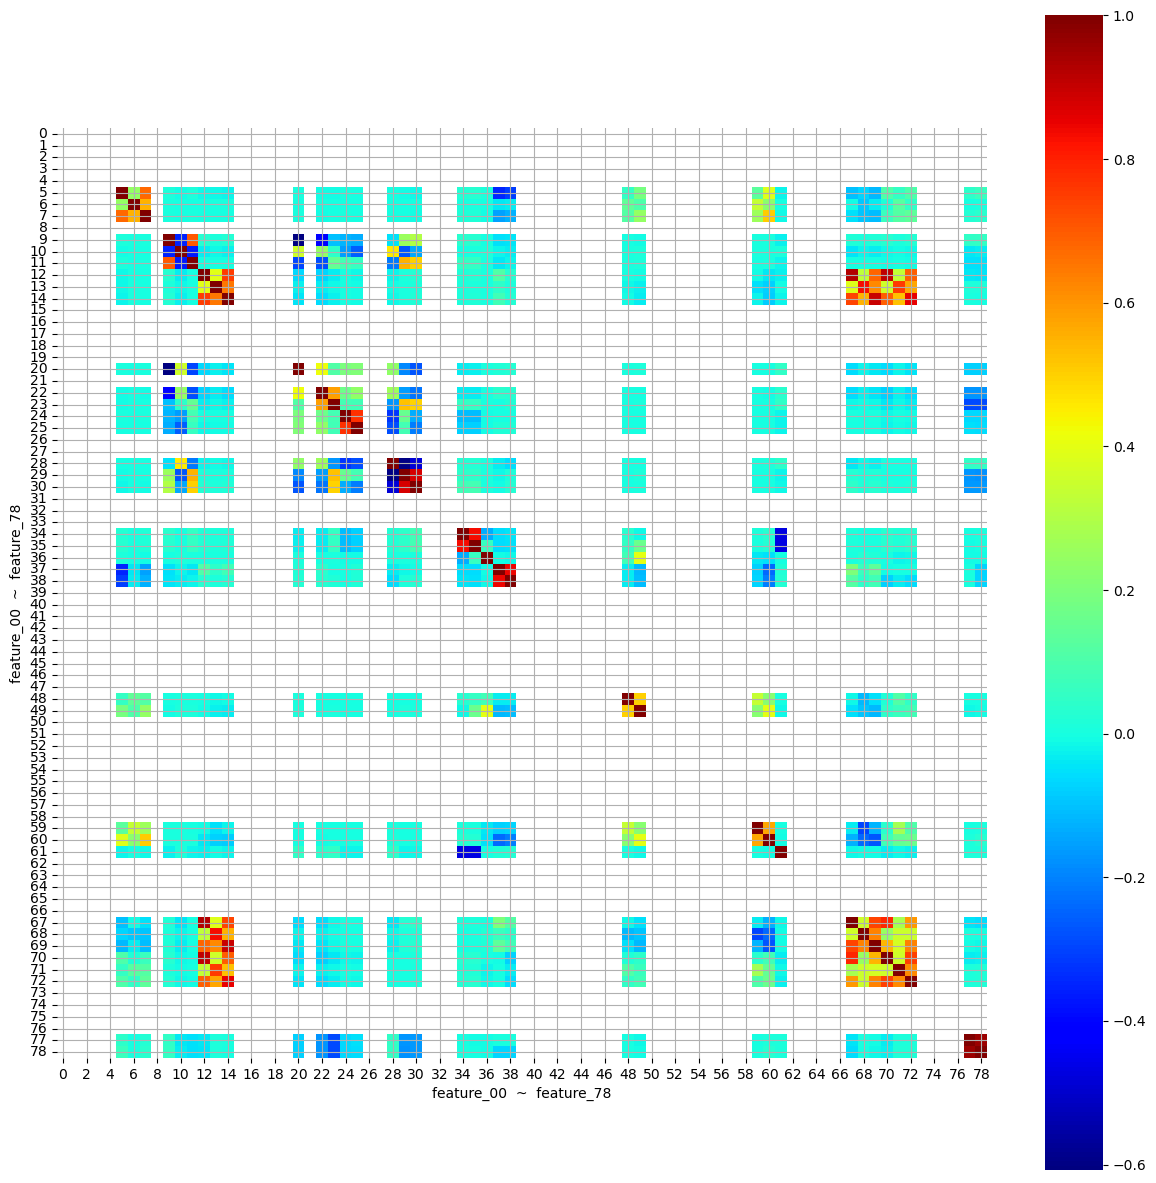

In [32]:
plt.figure(figsize=(15, 15))
sns.heatmap(train[[ f"feature_{target:02d}" for target in range(79)]].corr(), square=True, cmap="jet")
plt.xlabel("feature_00  ~  feature_78")
plt.ylabel("feature_00  ~  feature_78")
plt.grid()
plt.show()

## responder_0 - 8

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
column = responder_0
 - mean  : 0.0084
 - sigma : 0.9559
 - min  : -5.0000
 - max  : 5.0000


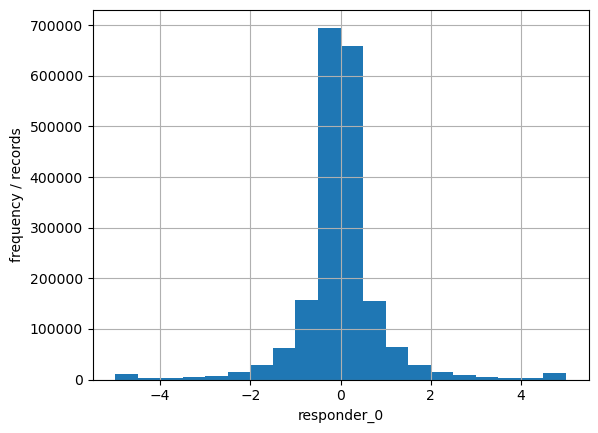

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
column = responder_1
 - mean  : 0.0108
 - sigma : 1.1418
 - min  : -5.0000
 - max  : 5.0000


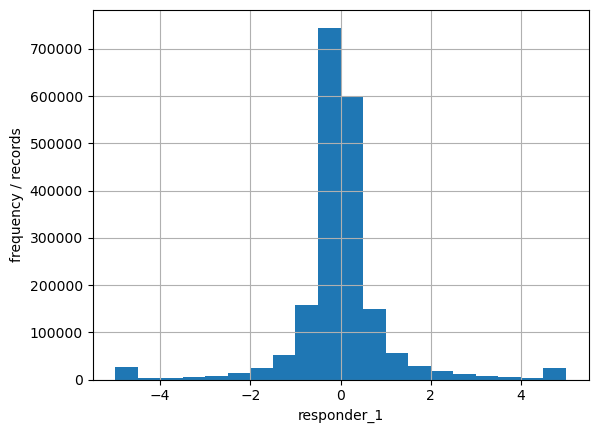

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
column = responder_2
 - mean  : 0.0024
 - sigma : 0.8442
 - min  : -5.0000
 - max  : 5.0000


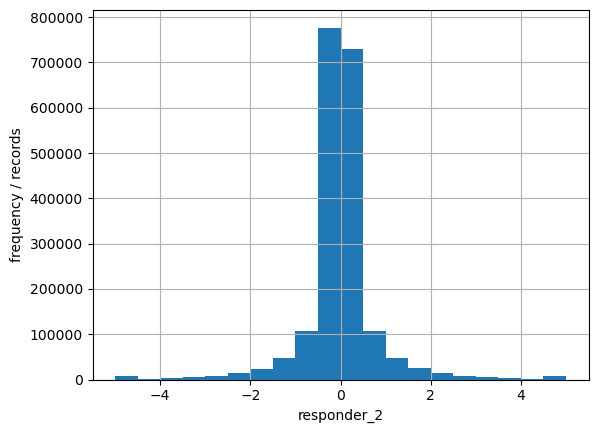

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
column = responder_3
 - mean  : 0.0114
 - sigma : 1.2760
 - min  : -5.0000
 - max  : 5.0000


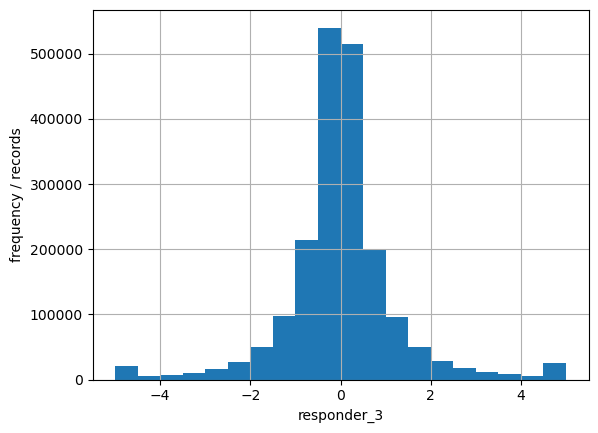

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
column = responder_4
 - mean  : 0.0219
 - sigma : 1.2664
 - min  : -5.0000
 - max  : 5.0000


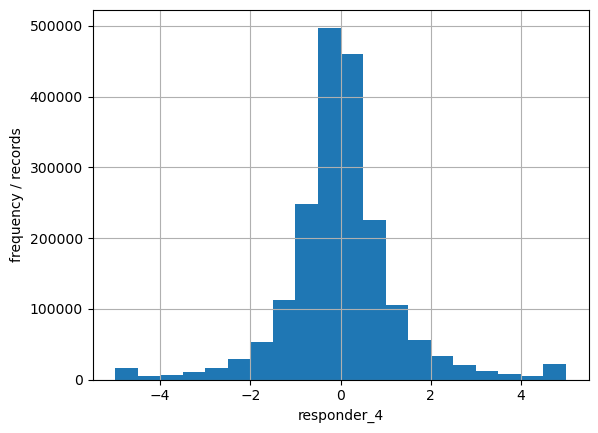

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
column = responder_5
 - mean  : 0.0033
 - sigma : 1.2252
 - min  : -5.0000
 - max  : 5.0000


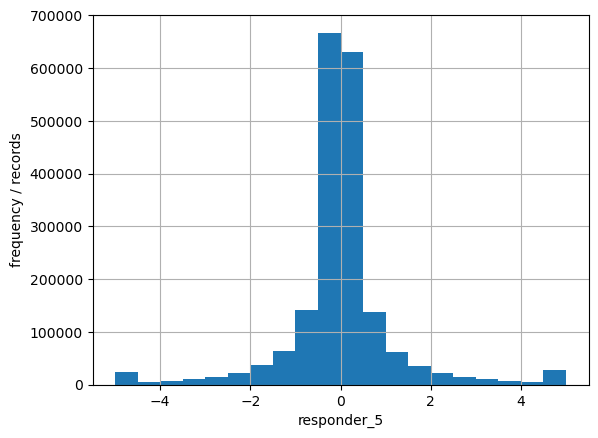

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
column = responder_6
 - mean  : 0.0015
 - sigma : 0.8706
 - min  : -5.0000
 - max  : 5.0000


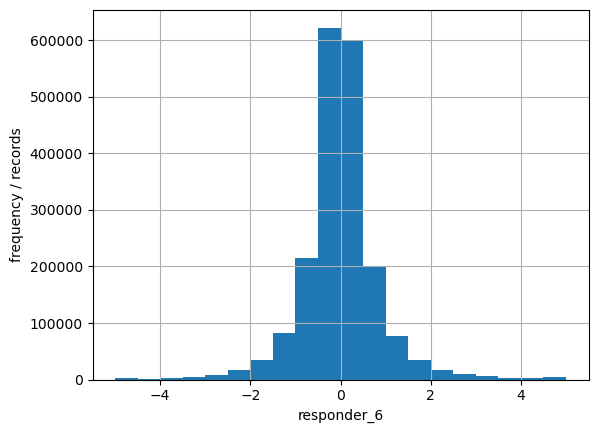

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
column = responder_7
 - mean  : -0.0005
 - sigma : 0.8918
 - min  : -5.0000
 - max  : 5.0000


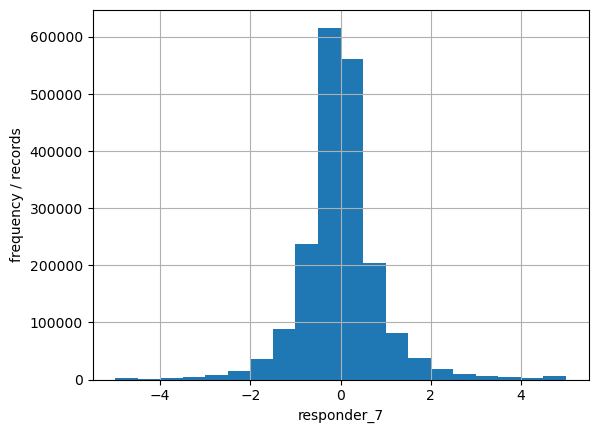

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
column = responder_8
 - mean  : 0.0011
 - sigma : 0.8737
 - min  : -5.0000
 - max  : 5.0000


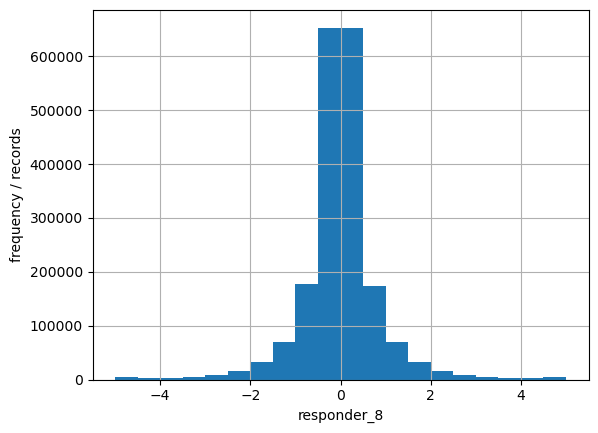

In [33]:
for target in range(9):
    col = f"responder_{target}"
    mean_, sgm_ = train[col].mean(), np.sqrt(train[col].var())
    min_, max_ = train[col].min(), train[col].max()
    print("- " * 30)
    print( f"column = {col}" )
    print( f" - mean  : {mean_:.4f}",  )
    print( f" - sigma : {sgm_:.4f}",  )
    print( f" - min  : {min_:.4f}",  )
    print( f" - max  : {max_:.4f}",  )
    
    plt.hist(train[col], bins=20)
    plt.xlabel(col)
    plt.ylabel("frequency / records")
    #plt.yscale("log")
    plt.grid()
    plt.show()

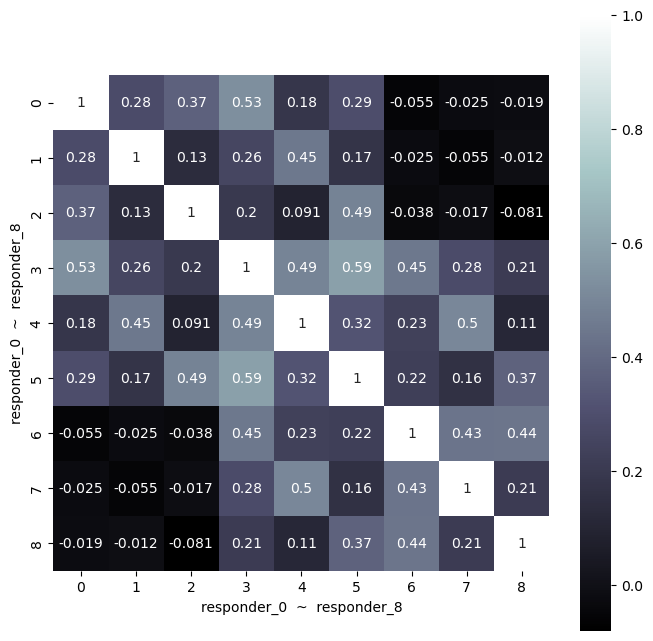

In [34]:
plt.figure(figsize=(8, 8))
sns.heatmap(train[[ f"responder_{target}" for target in range(9)]].corr(),  annot=True, square=True, cmap="bone")
plt.xlabel("responder_0  ~  responder_8")
plt.ylabel("responder_0  ~  responder_8")
plt.show()

## symbol_id

> train.parquet/partition_id=0/part-0.parquet
symbol_id:  0 - 38


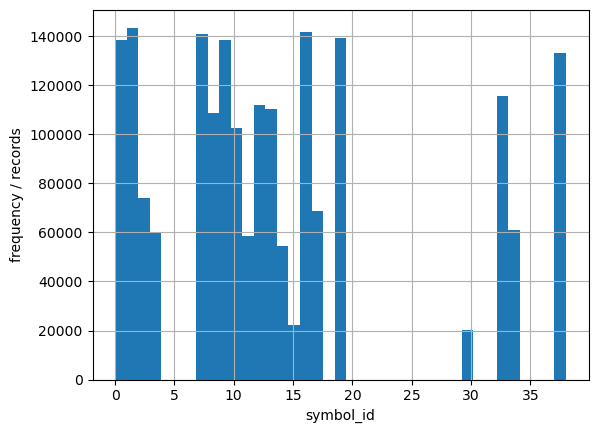

> train.parquet/partition_id=1/part-0.parquet
symbol_id:  0 - 38


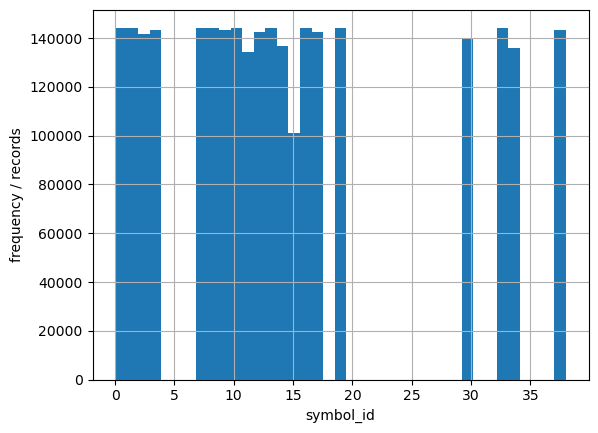

> train.parquet/partition_id=2/part-0.parquet
symbol_id:  0 - 38


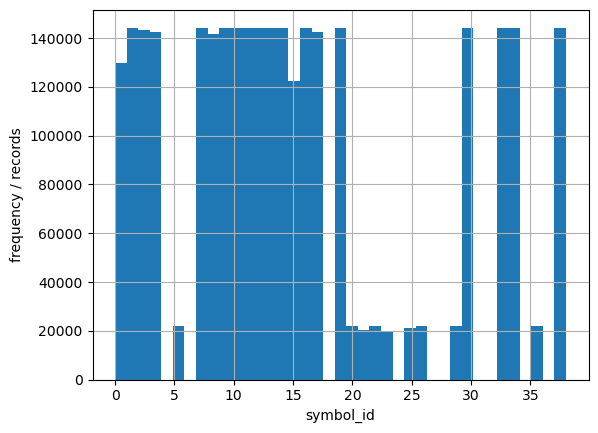

> train.parquet/partition_id=3/part-0.parquet
symbol_id:  0 - 38


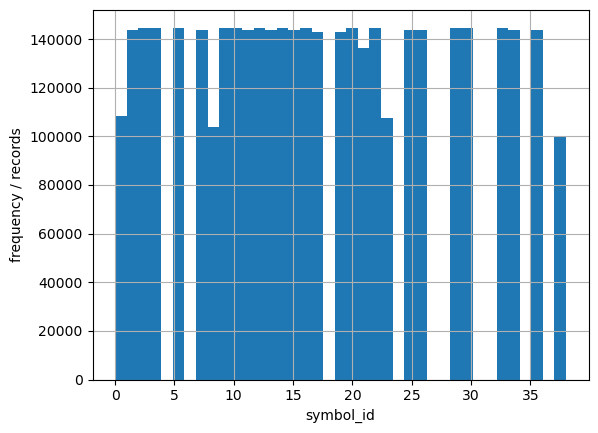

> train.parquet/partition_id=4/part-0.parquet
symbol_id:  0 - 38


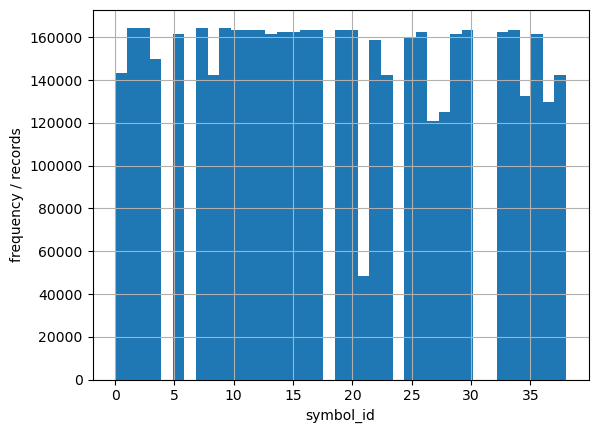

> train.parquet/partition_id=5/part-0.parquet
symbol_id:  0 - 38


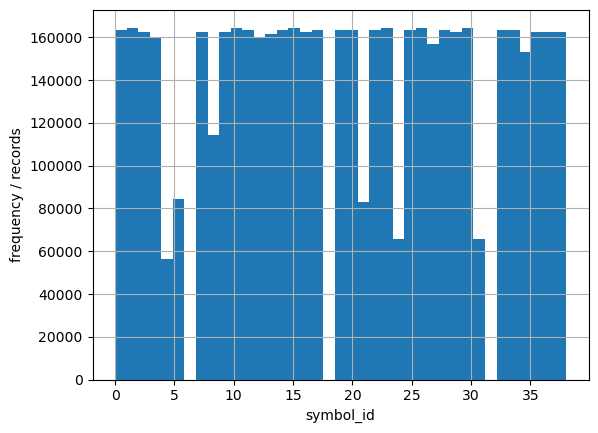

> train.parquet/partition_id=6/part-0.parquet
symbol_id:  0 - 38


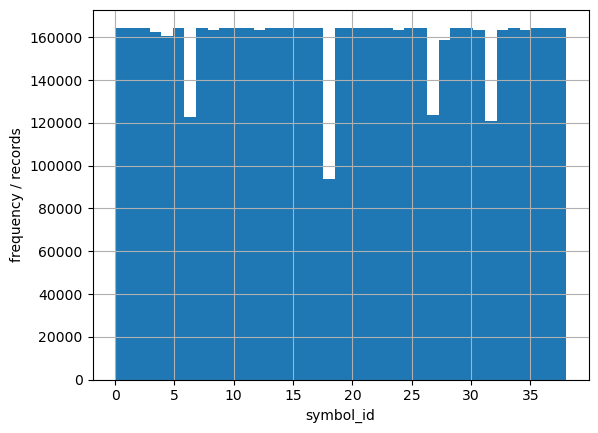

> train.parquet/partition_id=7/part-0.parquet
symbol_id:  0 - 38


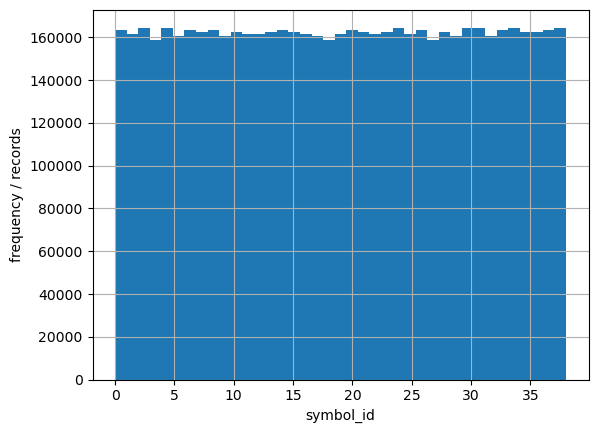

> train.parquet/partition_id=8/part-0.parquet
symbol_id:  0 - 38


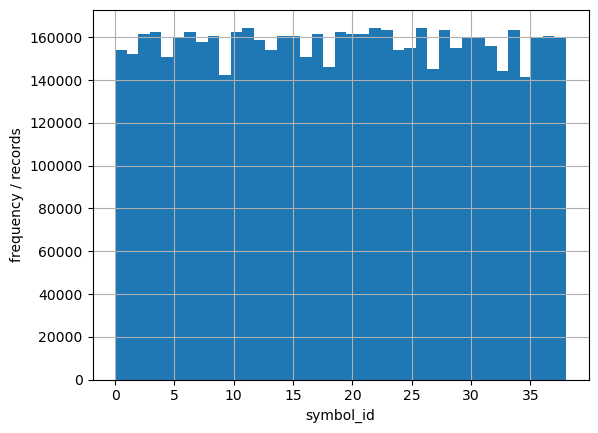

> train.parquet/partition_id=9/part-0.parquet
symbol_id:  0 - 38


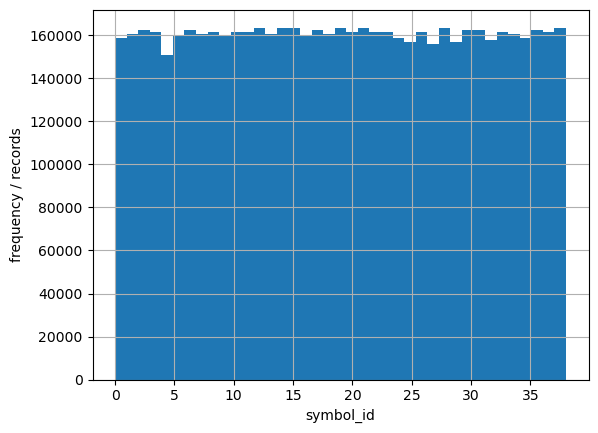

In [35]:
for partition_id in range(10):
    print(f"> train.parquet/partition_id={partition_id}/part-0.parquet")
    train_data = pl.read_parquet(f"{DATA_DIR}/train.parquet/partition_id={partition_id}/part-0.parquet")

    print( f"symbol_id: ", train_data["symbol_id"].min(), "-", train_data["symbol_id"].max())
    bins = train_data["symbol_id"].max() - train_data["symbol_id"].min() + 1
    plt.hist(train_data["symbol_id"], bins=bins)
    plt.xlabel("symbol_id")
    plt.ylabel("frequency / records")
    plt.grid()
    plt.show()

## date_id

> train.parquet/partition_id=0/part-0.parquet
date_id:  0 - 169


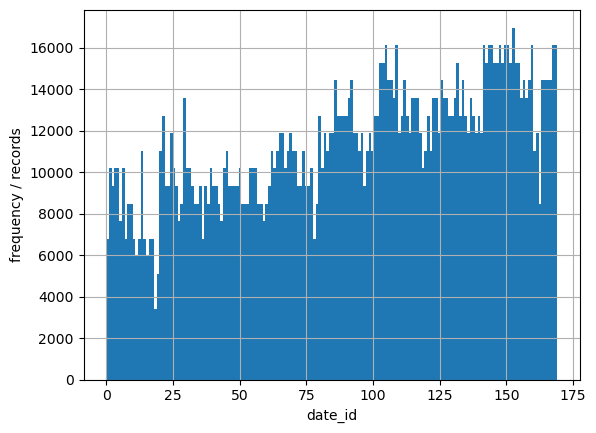

> train.parquet/partition_id=1/part-0.parquet
date_id:  170 - 339


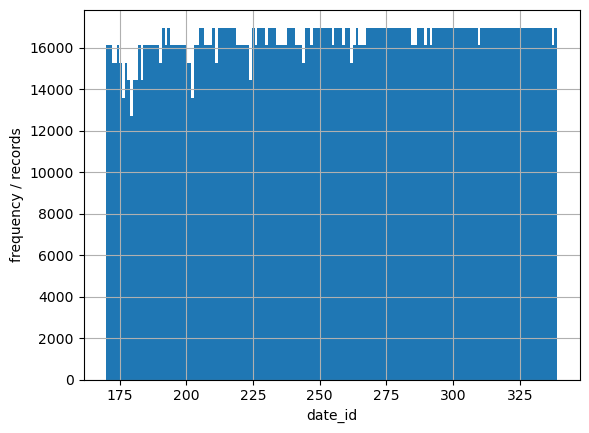

> train.parquet/partition_id=2/part-0.parquet
date_id:  340 - 509


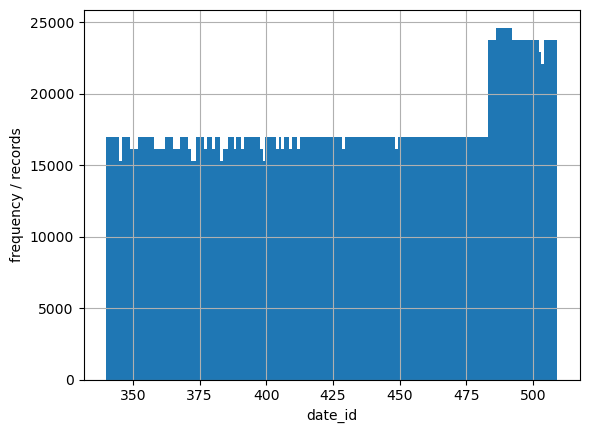

> train.parquet/partition_id=3/part-0.parquet
date_id:  510 - 679


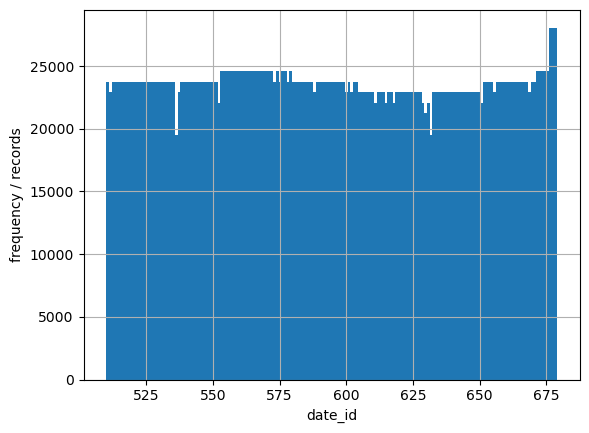

> train.parquet/partition_id=4/part-0.parquet
date_id:  680 - 849


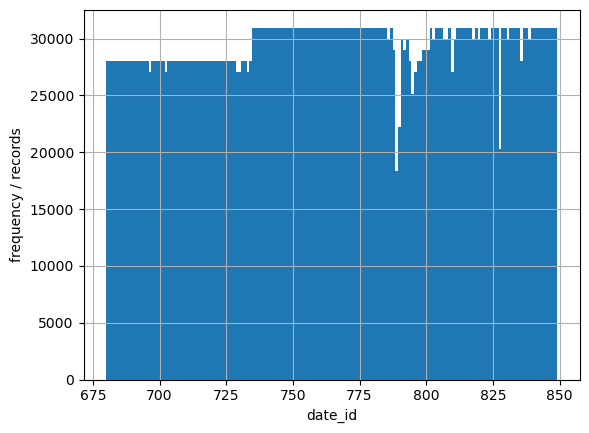

> train.parquet/partition_id=5/part-0.parquet
date_id:  850 - 1019


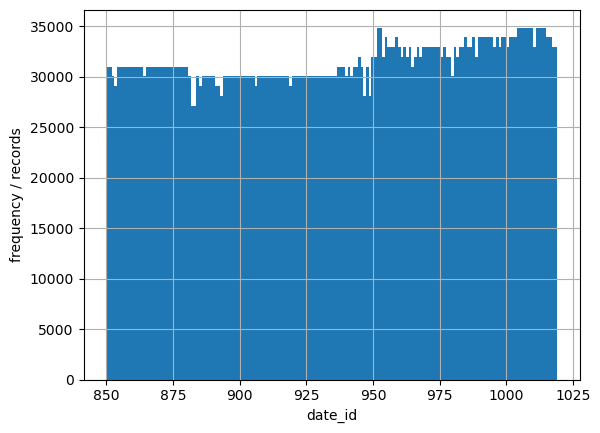

> train.parquet/partition_id=6/part-0.parquet
date_id:  1020 - 1189


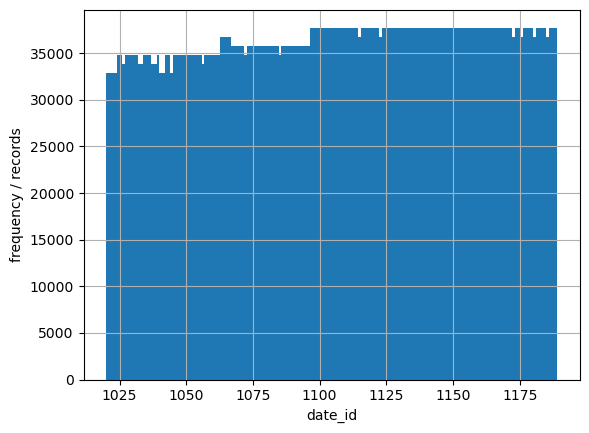

> train.parquet/partition_id=7/part-0.parquet
date_id:  1190 - 1359


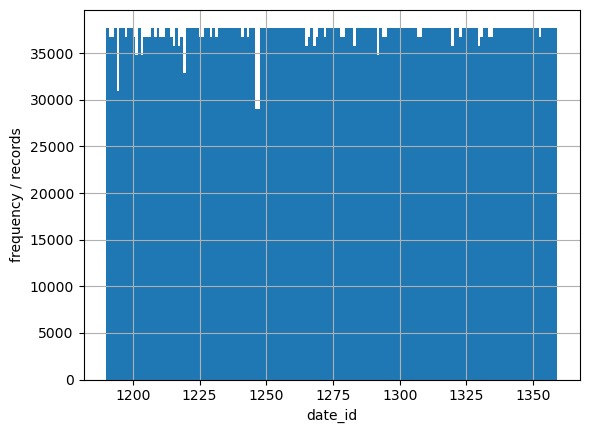

> train.parquet/partition_id=8/part-0.parquet
date_id:  1360 - 1529


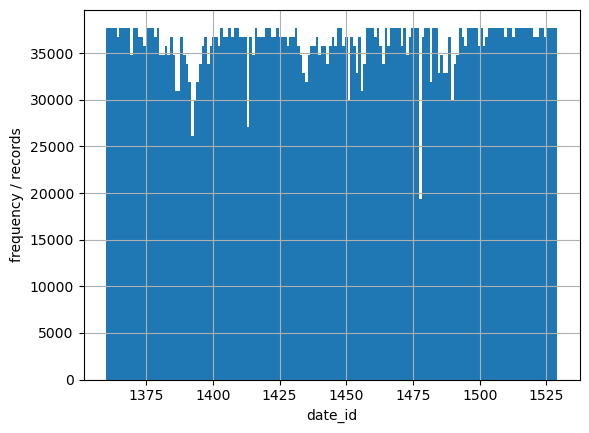

> train.parquet/partition_id=9/part-0.parquet
date_id:  1530 - 1698


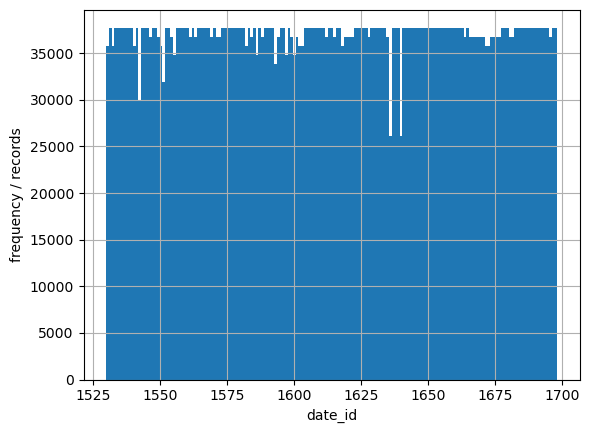

In [36]:
for partition_id in range(10):
    print(f"> train.parquet/partition_id={partition_id}/part-0.parquet")
    train_data = pl.read_parquet(f"{DATA_DIR}/train.parquet/partition_id={partition_id}/part-0.parquet")

    print( f"date_id: ", train_data["date_id"].min(), "-", train_data["date_id"].max())
    bins = train_data["date_id"].max() - train_data["date_id"].min() + 1
    plt.hist(train_data["date_id"], bins=bins)
    plt.xlabel("date_id")
    plt.ylabel("frequency / records")
    plt.grid()
    plt.show()

# Test.parquet

- **test.parquet** - A mock test set which represents the structure of the unseen test set. This example set demonstrates a single batch served by the evaluation API, that is, data from a single `date_id, time_id` pair. The test set contains columns including `date_id`, `time_id`, `symbol_id`, `weight` and `feature_{00...78}`. You will not be directly using the test set or sample submission in this competition, as the evaluation API will get/set the test set and predictions.

In [37]:
test = (
    pl.read_parquet(f"{DATA_DIR}/test.parquet/date_id=0/part-0.parquet")
)
test.shape

(39, 85)

In [38]:
test

row_id,date_id,time_id,symbol_id,weight,is_scored,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,feature_08,feature_09,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,…,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78
i64,i16,i16,i8,f32,bool,f32,f32,f32,f32,f32,f32,f32,f32,f32,f64,f64,f64,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,…,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32
0,0,0,0,3.169998,false,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,null,-0.0,null,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,…,null,-0.0,null,-0.0,0.0,-0.0,0.0,0.0,null,0.0,null,null,-0.0,null,-0.0,0.0,null,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,null,null,0.0,0.0,-0.0,-0.0
1,0,0,1,2.165993,false,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,null,-0.0,null,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,…,null,-0.0,null,-0.0,0.0,0.0,0.0,0.0,null,0.0,null,null,-0.0,null,-0.0,0.0,null,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,null,null,0.0,0.0,0.0,0.0
2,0,0,2,3.06555,false,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,null,-0.0,null,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,…,null,-0.0,null,-0.0,0.0,-0.0,-0.0,-0.0,null,0.0,null,null,-0.0,null,-0.0,0.0,null,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,null,null,0.0,0.0,-0.0,-0.0
3,0,0,3,2.698642,false,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,null,-0.0,null,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,…,null,-0.0,null,-0.0,0.0,-0.0,0.0,-0.0,null,-0.0,null,null,-0.0,null,-0.0,0.0,null,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,null,null,0.0,0.0,-0.0,-0.0
4,0,0,4,1.80333,false,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,null,-0.0,null,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,…,null,-0.0,null,-0.0,0.0,0.0,0.0,0.0,null,0.0,null,null,-0.0,null,-0.0,0.0,null,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,null,null,0.0,0.0,0.0,0.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
34,0,0,34,3.240565,false,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,null,-0.0,null,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,…,null,-0.0,null,-0.0,-0.0,-0.0,-0.0,-0.0,null,-0.0,null,null,-0.0,null,-0.0,-0.0,null,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,null,null,0.0,0.0,0.0,0.0
35,0,0,35,1.057221,false,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,null,-0.0,null,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,…,null,0.0,null,-0.0,0.0,0.0,0.0,0.0,null,0.0,null,null,0.0,null,-0.0,0.0,null,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,null,null,0.0,0.0,-0.0,-0.0
36,0,0,36,0.907022,false,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,null,-0.0,null,-0.0,-0.0,-0.0,null,-0.0,-0.0,0.0,-0.0,null,null,-0.0,-0.0,-0.0,…,null,-0.0,null,-0.0,0.0,-0.0,0.0,0.0,null,0.0,null,null,0.0,null,-0.0,0.0,null,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,null,null,0.0,0.0,0.0,0.0


## Missing values

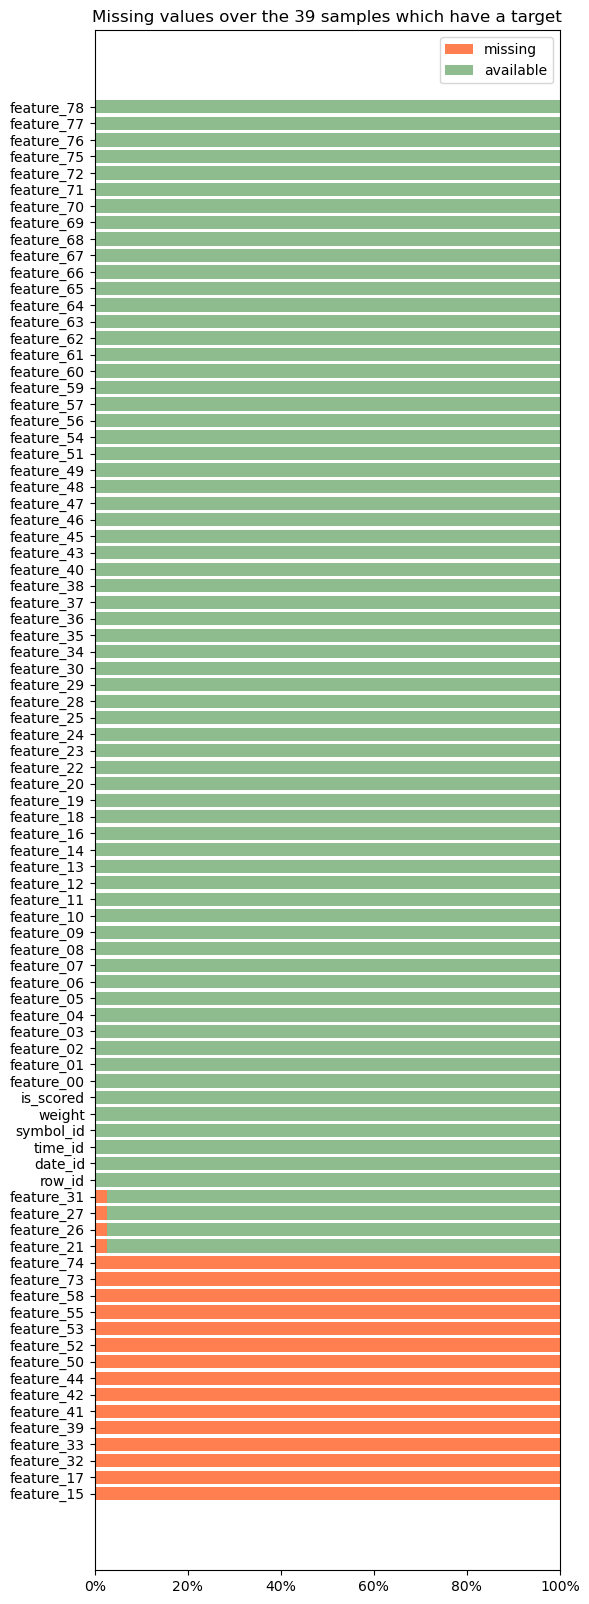

In [39]:
supervised_usable = (
    test
)

missing_count = (
    supervised_usable
    .null_count()
    .transpose(include_header=True,
               header_name='feature',
               column_names=['null_count'])
    .sort('null_count', descending=True)
    .with_columns((pl.col('null_count') / len(supervised_usable)).alias('null_ratio'))
)

plt.figure(figsize=(6, 20))
plt.title(f'Missing values over the {len(supervised_usable)} samples which have a target')
plt.barh(np.arange(len(missing_count)), missing_count.get_column('null_ratio'), color='coral', label='missing')
plt.barh(np.arange(len(missing_count)), 
         1 - missing_count.get_column('null_ratio'),
         left=missing_count.get_column('null_ratio'),
         color='darkseagreen', label='available')
plt.yticks(np.arange(len(missing_count)), missing_count.get_column('feature'))
plt.gca().xaxis.set_major_formatter(PercentFormatter(xmax=1, decimals=0))
plt.xlim(0, 1)
plt.legend()
plt.show()

# lags.parquet

- `lags.parquet` - Values of `responder_{0...8}` lagged by one `date_id`. The evaluation API serves the entirety of the lagged responders for a `date_id` on that date_id's first `time_id`. In other words, all of the previous date's responders will be served at the first time step of the succeeding date.

In [40]:
lags = (
    pl.read_parquet(f"{DATA_DIR}/lags.parquet/date_id=0/part-0.parquet")
)
lags.shape

(39, 12)

In [25]:
lags.columns

['date_id',
 'time_id',
 'symbol_id',
 'responder_0_lag_1',
 'responder_1_lag_1',
 'responder_2_lag_1',
 'responder_3_lag_1',
 'responder_4_lag_1',
 'responder_5_lag_1',
 'responder_6_lag_1',
 'responder_7_lag_1',
 'responder_8_lag_1']

In [26]:
lags

date_id,time_id,symbol_id,responder_0_lag_1,responder_1_lag_1,responder_2_lag_1,responder_3_lag_1,responder_4_lag_1,responder_5_lag_1,responder_6_lag_1,responder_7_lag_1,responder_8_lag_1
i16,i16,i8,f32,f32,f32,f32,f32,f32,f32,f32,f32
0,0,0,-0.442215,-0.322407,0.143594,-0.92689,-0.782236,-0.036595,-1.305746,-0.795677,-0.143724
0,0,1,-0.651829,-1.70784,-0.893942,-1.065488,-1.871338,-0.615652,-1.162801,-1.205924,-1.245934
0,0,2,-0.656373,-0.264575,-0.892879,-1.511886,-1.03348,-0.378265,-1.57429,-1.863071,-0.027343
0,0,3,-0.188186,-0.19097,-0.70149,0.098453,-1.015506,-0.054984,0.329152,-0.965471,0.576635
0,0,4,-0.257462,-0.471325,-0.29742,0.074018,-0.324194,-0.597093,0.219856,-0.276356,-0.90479
…,…,…,…,…,…,…,…,…,…,…,…
0,0,34,-0.185392,-0.187891,-0.206658,-0.634903,-0.643175,-0.443875,-0.556474,-1.122211,-0.884185
0,0,35,-0.308923,-0.434147,-1.354941,0.30054,-0.830827,0.424937,0.518839,-0.687369,1.440577
0,0,36,-0.074661,-0.261698,-0.007051,-2.60039,-1.146709,-1.601274,-3.216254,-1.249338,-2.868875


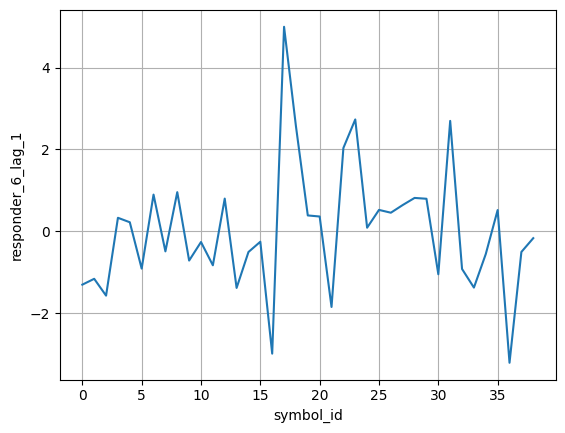

In [27]:
plt.plot(lags["responder_6_lag_1"])
plt.grid()
plt.xlabel("symbol_id")
plt.ylabel("responder_6_lag_1")
plt.show()